In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import time
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#read datasheet
data = pd.read_csv("Data.csv")
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
print("Shape of data : ", data.shape)
print("Dim of data: ",data.ndim)

Shape of data :  (61069, 21)
Dim of data:  2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

### Handling Null values

In [5]:
data.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [6]:
data.isnull().sum()/data.shape[0]*100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

In [7]:
#remove columns that has >10% missing values
#'stem-root','stem-surface','veil-type','veil-color','spore-print-color','gill-spacing','gill-attachment','cap-surface'

data = data.drop(['stem-root','stem-surface','veil-type','veil-color',
                  'spore-print-color','gill-spacing','gill-attachment','cap-surface'],axis=1)
data.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,p,d,w


In [8]:
data.isnull().sum()/data.shape[0]*100

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-color              0.000000
has-ring                0.000000
ring-type               4.046243
habitat                 0.000000
season                  0.000000
dtype: float64

In [9]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [10]:
data['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [11]:
data['ring-type'] = data['ring-type'].fillna(data['ring-type'].mode()[0])
data.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,p,d,w


In [12]:
data.isnull().sum()/data.shape[0]*100

class                   0.0
cap-diameter            0.0
cap-shape               0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64

### Preprocessing - Convert categorical to numerical 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  ring-type             61069 non-null  object 
 11  habitat               61069 non-null  object 
 12  season                61069 non-null  object 
dtypes: float64(3), object(10)
memory usage: 6.1+ MB


In [14]:
object_features = list(data.select_dtypes('object').columns)
object_features

['class',
 'cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [15]:
for col in object_features:
    print(col,": ",data[col].unique())

class :  ['p' 'e']
cap-shape :  ['x' 'f' 'p' 'b' 'c' 's' 'o']
cap-color :  ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does-bruise-or-bleed :  ['f' 't']
gill-color :  ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem-color :  ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
has-ring :  ['t' 'f']
ring-type :  ['g' 'p' 'e' 'l' 'f' 'm' 'r' 'z']
habitat :  ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season :  ['w' 'u' 'a' 's']


In [16]:
for col in object_features:
    print(data[col].value_counts())
    print("--------------------------------")

p    33888
e    27181
Name: class, dtype: int64
--------------------------------
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: cap-shape, dtype: int64
--------------------------------
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64
--------------------------------
f    50479
t    10590
Name: does-bruise-or-bleed, dtype: int64
--------------------------------
w    18521
n     9645
y     9546
p     5983
g     4118
f     3530
o     2909
k     2375
r     1399
e     1066
u     1023
b      954
Name: gill-color, dtype: int64
--------------------------------
w    22926
n    18063
y     7865
g     2626
o     2187
e     2050
u     1490
f     1059
p     1025
k      837
r      542
l      226
b      173
Name: stem-color, dtype: int64
--------------------------------
f    45890
t    15179
Name: has-ring, dtype: int64
--------------------------------
f

In [17]:
def labelencoder(features):
    le=LabelEncoder()
    le.fit(features)
    print(features.name,le.classes_)
    return le.transform(features)

In [18]:
for feat in object_features:
    data[feat]=labelencoder(data[feat])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'o' 'p' 's' 'x']
cap-color ['b' 'e' 'g' 'k' 'l' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
does-bruise-or-bleed ['f' 't']
gill-color ['b' 'e' 'f' 'g' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stem-color ['b' 'e' 'f' 'g' 'k' 'l' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
has-ring ['f' 't']
ring-type ['e' 'f' 'g' 'l' 'm' 'p' 'r' 'z']
habitat ['d' 'g' 'h' 'l' 'm' 'p' 'u' 'w']
season ['a' 's' 'u' 'w']


In [19]:
for col in object_features:
    print(data[col].value_counts())
    print("--------------------------------")

1    33888
0    27181
Name: class, dtype: int64
--------------------------------
6    26934
2    13404
5     7164
0     5694
3     3460
4     2598
1     1815
Name: cap-shape, dtype: int64
--------------------------------
5     24218
11     8543
10     7666
2      4420
1      4035
6      3656
8      1782
9      1709
7      1703
3      1279
0      1230
4       828
Name: cap-color, dtype: int64
--------------------------------
0    50479
1    10590
Name: does-bruise-or-bleed, dtype: int64
--------------------------------
10    18521
5      9645
11     9546
7      5983
3      4118
2      3530
6      2909
4      2375
8      1399
1      1066
9      1023
0       954
Name: gill-color, dtype: int64
--------------------------------
11    22926
6     18063
12     7865
3      2626
7      2187
1      2050
10     1490
2      1059
8      1025
4       837
9       542
5       226
0       173
Name: stem-color, dtype: int64
--------------------------------
0    45890
1    15179
Name: has-ring, dtype: int

In [20]:
data.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,6,0,10,16.95,17.09,11,1,2,0,3
1,1,16.60,6,6,0,10,17.99,18.19,11,1,2,0,2
2,1,14.07,6,6,0,10,17.80,17.74,11,1,2,0,3
3,1,14.17,2,1,0,10,15.77,15.98,11,1,5,0,3
4,1,14.64,6,6,0,10,16.53,17.20,11,1,5,0,3


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int32  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int32  
 3   cap-color             61069 non-null  int32  
 4   does-bruise-or-bleed  61069 non-null  int32  
 5   gill-color            61069 non-null  int32  
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  int32  
 9   has-ring              61069 non-null  int32  
 10  ring-type             61069 non-null  int32  
 11  habitat               61069 non-null  int32  
 12  season                61069 non-null  int32  
dtypes: float64(3), int32(10)
memory usage: 3.7 MB


### Split X,Y

In [22]:
x = data.iloc[:,1:]
x.head()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,6,6,0,10,16.95,17.09,11,1,2,0,3
1,16.60,6,6,0,10,17.99,18.19,11,1,2,0,2
2,14.07,6,6,0,10,17.80,17.74,11,1,2,0,3
3,14.17,2,1,0,10,15.77,15.98,11,1,5,0,3
4,14.64,6,6,0,10,16.53,17.20,11,1,5,0,3


In [23]:
y = data.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

In [24]:
x.shape

(61069, 12)

### Handling Outliers

In [25]:
x.describe()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.733854,4.041641,6.144541,0.173410,7.338502,6.581538,12.149410,8.429072,0.248555,1.449999,0.623721,1.053300
std,5.264845,2.138630,3.171077,0.378605,3.186426,3.370017,10.035955,3.218516,0.432179,1.468299,1.265880,1.100575
min,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.480000,2.000000,5.000000,0.000000,5.000000,4.640000,5.210000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,5.860000,5.000000,5.000000,0.000000,7.000000,5.950000,10.190000,11.000000,0.000000,1.000000,0.000000,1.000000
75%,8.540000,6.000000,10.000000,0.000000,10.000000,7.740000,16.570000,11.000000,0.000000,1.000000,1.000000,2.000000
max,62.340000,6.000000,11.000000,1.000000,11.000000,33.920000,103.910000,12.000000,1.000000,7.000000,7.000000,3.000000


In [26]:
x.head()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,6,6,0,10,16.95,17.09,11,1,2,0,3
1,16.60,6,6,0,10,17.99,18.19,11,1,2,0,2
2,14.07,6,6,0,10,17.80,17.74,11,1,2,0,3
3,14.17,2,1,0,10,15.77,15.98,11,1,5,0,3
4,14.64,6,6,0,10,16.53,17.20,11,1,5,0,3


In [27]:
numerical_features=['cap-diameter','stem-height','stem-width']

cap-diameter


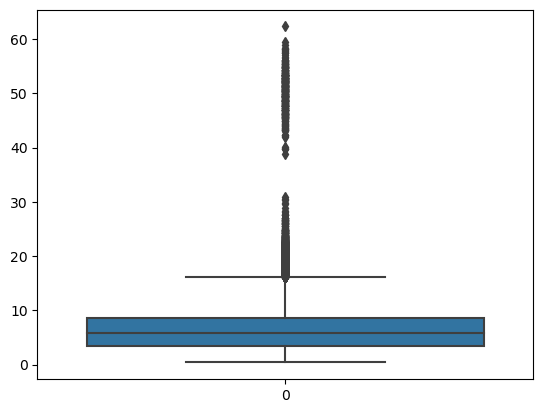

stem-height


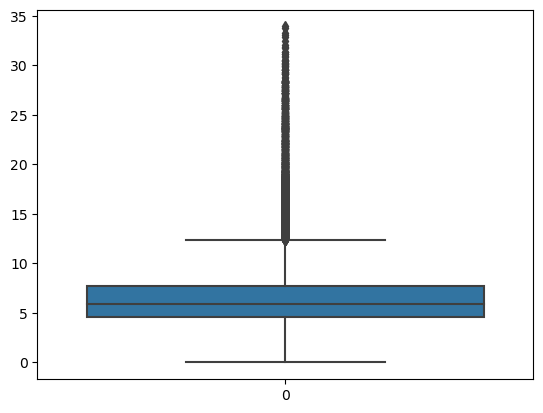

stem-width


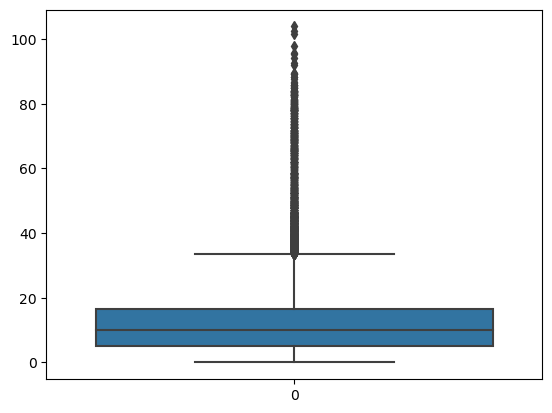

In [28]:
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()
    
for i in numerical_features:
    print(i)
    boxplots(i)

In [29]:
# Let's check the number of outliers per columns
Q1 = x[numerical_features].quantile(0.25)
Q3 = x[numerical_features].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR
print(UL)
print()
print(LL)

cap-diameter    16.13
stem-height     12.39
stem-width      33.61
dtype: float64

cap-diameter    -4.11
stem-height     -0.01
stem-width     -11.83
dtype: float64


In [30]:
((x>UL) | (x < LL)).sum()

cap-color                  0
cap-diameter            2400
cap-shape                  0
does-bruise-or-bleed       0
gill-color                 0
habitat                    0
has-ring                   0
ring-type                  0
season                     0
stem-color                 0
stem-height             3169
stem-width              1967
dtype: int64

In [31]:
((x>UL) | (x < LL)).sum()/x.shape[0]*100

cap-color               0.000000
cap-diameter            3.929981
cap-shape               0.000000
does-bruise-or-bleed    0.000000
gill-color              0.000000
habitat                 0.000000
has-ring                0.000000
ring-type               0.000000
season                  0.000000
stem-color              0.000000
stem-height             5.189212
stem-width              3.220947
dtype: float64

In [32]:
x[((x>UL) | (x < LL))] = np.NaN

In [33]:
x.isnull().sum().sum()

7536

In [34]:
# Applying capping method by using KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_impute = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x_impute

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.260,6.0,6.0,0.0,10.0,9.978,17.09,11.0,1.0,2.0,0.0,3.0
1,14.868,6.0,6.0,0.0,10.0,11.256,18.19,11.0,1.0,2.0,0.0,2.0
2,14.070,6.0,6.0,0.0,10.0,10.516,17.74,11.0,1.0,2.0,0.0,3.0
3,14.170,2.0,1.0,0.0,10.0,11.124,15.98,11.0,1.0,5.0,0.0,3.0
4,14.640,6.0,6.0,0.0,10.0,11.422,17.20,11.0,1.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.180,5.0,11.0,0.0,2.0,3.930,6.22,12.0,0.0,1.0,0.0,0.0
61065,1.270,2.0,11.0,0.0,2.0,3.180,5.43,12.0,0.0,1.0,0.0,0.0
61066,1.270,5.0,11.0,0.0,2.0,3.860,6.37,12.0,0.0,1.0,0.0,2.0
61067,1.240,2.0,11.0,0.0,2.0,3.560,5.44,12.0,0.0,1.0,0.0,2.0


In [35]:
x_impute.isnull().sum().sum()

0

In [36]:
((x_impute>UL) | (x_impute < LL)).sum()/x_impute.shape[0]*100

cap-color               0.0
cap-diameter            0.0
cap-shape               0.0
does-bruise-or-bleed    0.0
gill-color              0.0
habitat                 0.0
has-ring                0.0
ring-type               0.0
season                  0.0
stem-color              0.0
stem-height             0.0
stem-width              0.0
dtype: float64

### Scale data

In [38]:
x.describe()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,58669.000000,61069.000000,61069.000000,61069.000000,61069.000000,57900.000000,59102.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.045994,4.041641,6.144541,0.173410,7.338502,6.030409,11.013246,8.429072,0.248555,1.449999,0.623721,1.053300
std,3.387450,2.138630,3.171077,0.378605,3.186426,2.292521,7.566437,3.218516,0.432179,1.468299,1.265880,1.100575
min,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,2.000000,5.000000,0.000000,5.000000,4.560000,5.020000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,5.660000,5.000000,5.000000,0.000000,7.000000,5.820000,9.800000,11.000000,0.000000,1.000000,0.000000,1.000000
75%,8.170000,6.000000,10.000000,0.000000,10.000000,7.350000,15.790000,11.000000,0.000000,1.000000,1.000000,2.000000
max,16.120000,6.000000,11.000000,1.000000,11.000000,12.390000,33.610000,12.000000,1.000000,7.000000,7.000000,3.000000


In [39]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute),columns=x_impute.columns)

In [40]:
x_scaled.describe()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04,6.106900e+04
mean,8.377258e-17,-8.935742e-17,8.656500e-17,-2.122239e-16,-6.701806e-17,6.403948e-16,-7.818774e-17,-1.936077e-16,2.317708e-16,-5.957161e-17,-7.446452e-17,6.329484e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.656957e+00,-1.889843e+00,-1.937699e+00,-4.580286e-01,-2.303070e+00,-2.587542e+00,-1.442174e+00,-2.618953e+00,-5.751254e-01,-9.875450e-01,-4.927213e-01,-9.570536e-01
25%,-7.845210e-01,-9.546569e-01,-3.609344e-01,-4.580286e-01,-7.339010e-01,-6.523627e-01,-7.857838e-01,-7.547242e-01,-5.751254e-01,-3.064791e-01,-4.927213e-01,-9.570536e-01
50%,-1.175294e-01,4.481216e-01,-3.609344e-01,-4.580286e-01,-1.062335e-01,-1.131875e-01,-1.672624e-01,7.987995e-01,-5.751254e-01,-3.064791e-01,-4.927213e-01,-4.842997e-02
75%,6.085628e-01,9.157145e-01,1.215830e+00,-4.580286e-01,8.352679e-01,5.848145e-01,6.191434e-01,7.987995e-01,-5.751254e-01,-3.064791e-01,2.972497e-01,8.601937e-01
max,2.772768e+00,9.157145e-01,1.531183e+00,2.183270e+00,1.149102e+00,2.591048e+00,2.800378e+00,1.109504e+00,1.738751e+00,3.779916e+00,5.037076e+00,1.768817e+00


In [41]:
x_scaled.head()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,2.530737,0.915714,-0.045582,-0.458029,0.835268,1.582916,0.715077,0.798799,1.738751,0.374587,-0.492721,1.768817
1,2.420416,0.915714,-0.045582,-0.458029,0.835268,2.117075,0.853929,0.798799,1.738751,0.374587,-0.492721,0.860194
2,2.195834,0.915714,-0.045582,-0.458029,0.835268,1.807781,0.797126,0.798799,1.738751,0.374587,-0.492721,1.768817
3,2.223977,-0.954657,-1.622346,-0.458029,0.835268,2.061904,0.574963,0.798799,1.738751,2.417784,-0.492721,1.768817
4,2.356250,0.915714,-0.045582,-0.458029,0.835268,2.186457,0.728962,0.798799,1.738751,2.417784,-0.492721,1.768817


### Feature selection

In [42]:
# correlation analysis

correlations = {}
for col in x.columns:
    corr, _ = pearsonr(x_scaled[col], y)
    correlations[col] = corr
    
correlations### Feature selection

{'cap-diameter': -0.1782059043341524,
 'cap-shape': -0.10630907973461293,
 'cap-color': 0.02641065382595859,
 'does-bruise-or-bleed': -0.019888791615572693,
 'gill-color': -0.06070081202541224,
 'stem-height': -0.08915767203544236,
 'stem-width': -0.19307574037614106,
 'stem-color': -0.09477218222558922,
 'has-ring': 0.05755921217395349,
 'ring-type': 0.09233001102865214,
 'habitat': -0.04192334880647257,
 'season': -0.05404605168000002}

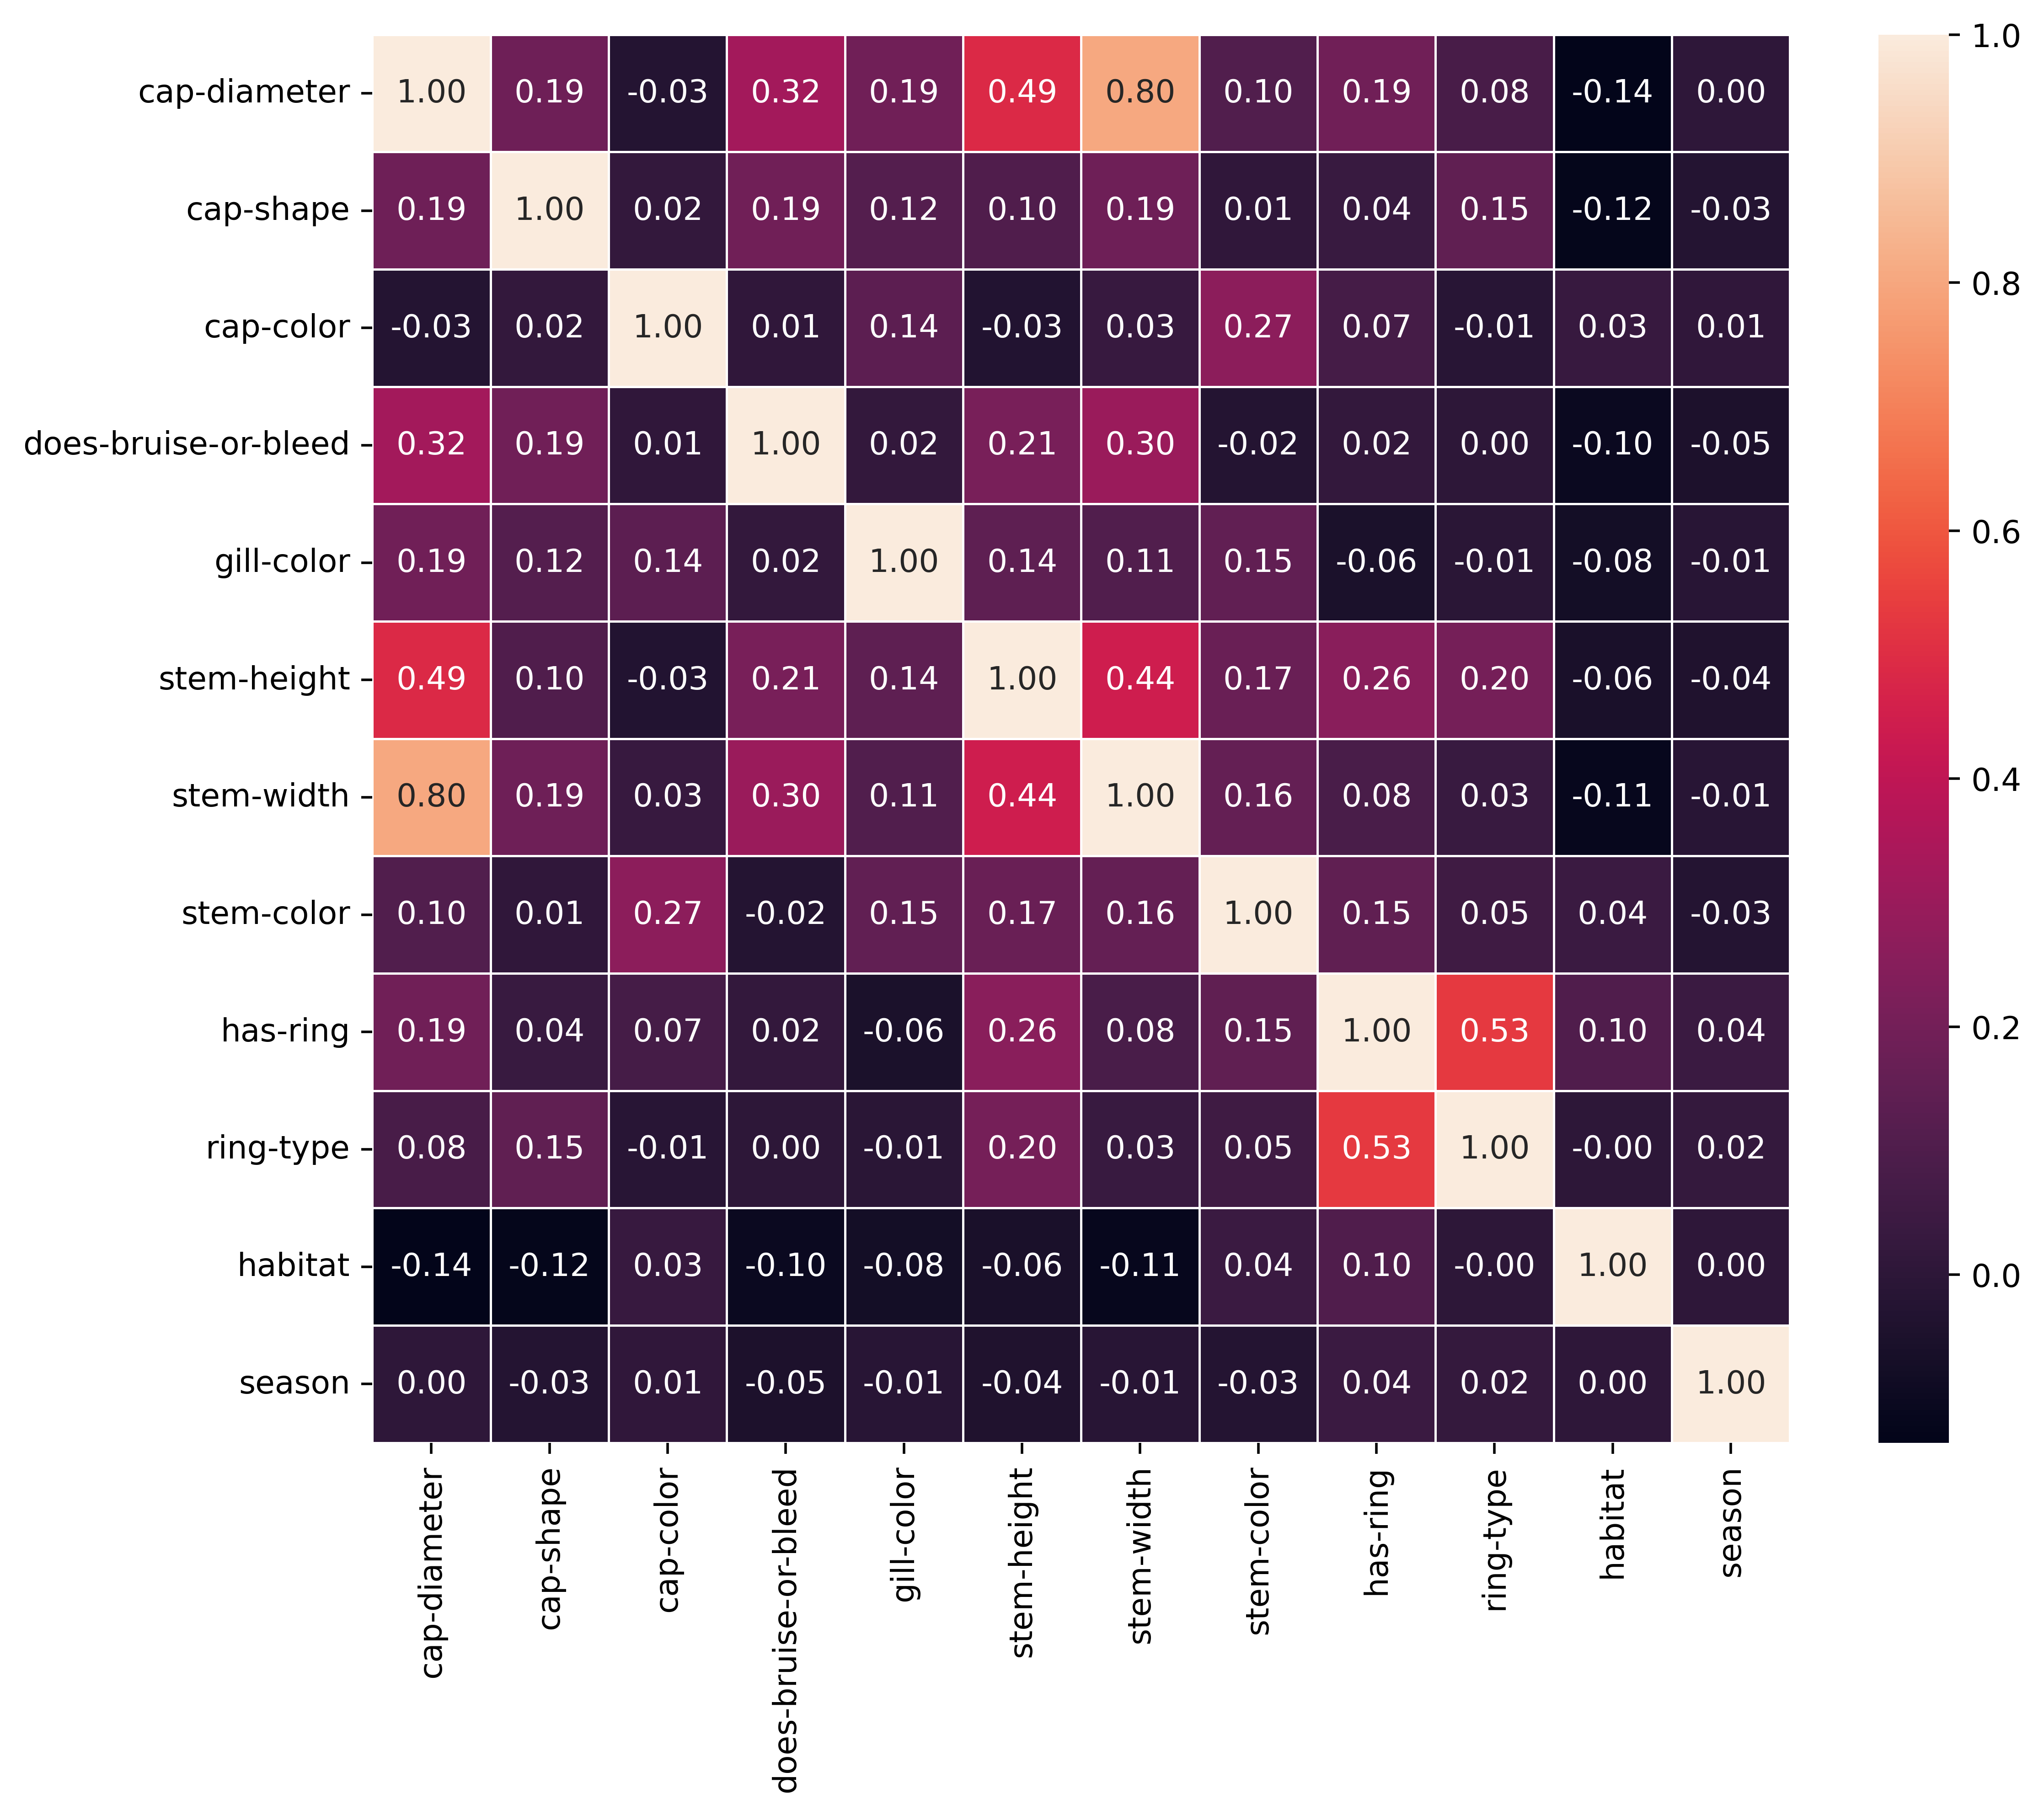

In [43]:
corr = x.corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

### Split into Train and Test data

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8,random_state=24)

In [45]:
print("Shape of X train",x_train.shape)
print("Shape of X test",x_test.shape)
print("Shape of Y train",y_train.shape)
print("Shape of Y test",y_test.shape)

Shape of X train (48855, 12)
Shape of X test (12214, 12)
Shape of Y train (48855,)
Shape of Y test (12214,)


## Model

### Logistic Regression

In [46]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
pred_train_lg = logreg.predict(x_train)
pred_test_lg = logreg.predict(x_test)

In [48]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_lg))
print("*******************************")
print(confusion_matrix(y_test, pred_test_lg))

***************Confusion Matrix*********************
[[10471 11360]
 [ 6785 20239]]
*******************************
[[2524 2826]
 [1746 5118]]


In [49]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_lg))
print("*******************************")
print(classification_report(y_test, pred_test_lg))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.61      0.48      0.54     21831
           1       0.64      0.75      0.69     27024

    accuracy                           0.63     48855
   macro avg       0.62      0.61      0.61     48855
weighted avg       0.63      0.63      0.62     48855

*******************************
              precision    recall  f1-score   support

           0       0.59      0.47      0.52      5350
           1       0.64      0.75      0.69      6864

    accuracy                           0.63     12214
   macro avg       0.62      0.61      0.61     12214
weighted avg       0.62      0.63      0.62     12214



In [50]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_lg))
print("*******************************")
print(accuracy_score(y_test, pred_test_lg))

***************accuracy_score*********************
0.6285948214102958
*******************************
0.6256754543965941


### Random Forest

In [201]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [202]:
pred_train_rf = model_rf.predict(x_train)
pred_test_rf = model_rf.predict(x_test)

In [203]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf))

***************Confusion Matrix*********************
[[21831     0]
 [    0 27024]]
*******************************
[[5317   33]
 [  22 6842]]


In [204]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf))
print("*******************************")
print(classification_report(y_test, pred_test_rf))

***************classification_report*********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21831
           1       1.00      1.00      1.00     27024

    accuracy                           1.00     48855
   macro avg       1.00      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855

*******************************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5350
           1       1.00      1.00      1.00      6864

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [205]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf))

***************accuracy_score*********************
1.0
*******************************
0.9954969706893728


### Gradient Boost

In [56]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [57]:
pred_train_gb = model_gb.predict(x_train)
pred_test_gb = model_gb.predict(x_test)

In [58]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_gb))
print("*******************************")
print(confusion_matrix(y_test, pred_test_gb))

***************Confusion Matrix*********************
[[18725  3106]
 [ 3073 23951]]
*******************************
[[4507  843]
 [ 790 6074]]


In [59]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_gb))
print("*******************************")
print(classification_report(y_test, pred_test_gb))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     21831
           1       0.89      0.89      0.89     27024

    accuracy                           0.87     48855
   macro avg       0.87      0.87      0.87     48855
weighted avg       0.87      0.87      0.87     48855

*******************************
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5350
           1       0.88      0.88      0.88      6864

    accuracy                           0.87     12214
   macro avg       0.86      0.86      0.86     12214
weighted avg       0.87      0.87      0.87     12214



In [60]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_gb))
print("*******************************")
print(accuracy_score(y_test, pred_test_gb))

***************accuracy_score*********************
0.8735236925596152
*******************************
0.8663009661044703


### Ada Boost

In [61]:
model_adb = AdaBoostClassifier()
model_adb.fit(x_train, y_train)

AdaBoostClassifier()

In [62]:
pred_train_adb = model_adb.predict(x_train)
pred_test_adb = model_adb.predict(x_test)

In [63]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_adb))
print("*******************************")
print(confusion_matrix(y_test, pred_test_adb))

***************Confusion Matrix*********************
[[15332  6499]
 [ 5905 21119]]
*******************************
[[3710 1640]
 [1505 5359]]


In [64]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_adb))
print("*******************************")
print(classification_report(y_test, pred_test_adb))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     21831
           1       0.76      0.78      0.77     27024

    accuracy                           0.75     48855
   macro avg       0.74      0.74      0.74     48855
weighted avg       0.75      0.75      0.75     48855

*******************************
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      5350
           1       0.77      0.78      0.77      6864

    accuracy                           0.74     12214
   macro avg       0.74      0.74      0.74     12214
weighted avg       0.74      0.74      0.74     12214



In [65]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_adb))
print("*******************************")
print(accuracy_score(y_test, pred_test_adb))

***************accuracy_score*********************
0.7461058233548256
*******************************
0.7425085966923203


### XGBOOST Classifier

In [66]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
pred_train_xgb = model_xgb.predict(x_train)
pred_test_xgb = model_xgb.predict(x_test)

In [68]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_xgb))
print("*******************************")
print(confusion_matrix(y_test, pred_test_xgb))

***************Confusion Matrix*********************
[[21741    90]
 [  147 26877]]
*******************************
[[5303   47]
 [  58 6806]]


In [69]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_xgb))
print("*******************************")
print(classification_report(y_test, pred_test_xgb))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21831
           1       1.00      0.99      1.00     27024

    accuracy                           1.00     48855
   macro avg       0.99      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855

*******************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5350
           1       0.99      0.99      0.99      6864

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



In [70]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_xgb))
print("*******************************")
print(accuracy_score(y_test, pred_test_xgb))

***************accuracy_score*********************
0.995148910039914
*******************************
0.9914033076797119


### KNN

In [71]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
pred_train_knn = model_knn.predict(x_train)
pred_test_knn = model_knn.predict(x_test)

In [73]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_knn))
print("*******************************")
print(confusion_matrix(y_test, pred_test_knn))

***************Confusion Matrix*********************
[[21707   124]
 [  175 26849]]
*******************************
[[5293   57]
 [  89 6775]]


In [74]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_knn))
print("*******************************")
print(classification_report(y_test, pred_test_knn))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21831
           1       1.00      0.99      0.99     27024

    accuracy                           0.99     48855
   macro avg       0.99      0.99      0.99     48855
weighted avg       0.99      0.99      0.99     48855

*******************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5350
           1       0.99      0.99      0.99      6864

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



In [75]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_knn))
print("*******************************")
print(accuracy_score(y_test, pred_test_knn))

***************accuracy_score*********************
0.9938798485313683
*******************************
0.9880465040117897


### SVM

In [76]:
from sklearn.svm import SVC
from sklearn import metrics
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [77]:
pred_train_svm = model_svc.predict(x_train)
pred_test_svm = model_svc.predict(x_test)

In [78]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_svm))
print("*******************************")
print(confusion_matrix(y_test, pred_test_svm))

***************Confusion Matrix*********************
[[20346  1485]
 [ 1789 25235]]
*******************************
[[4942  408]
 [ 447 6417]]


In [79]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_svm))
print("*******************************")
print(classification_report(y_test, pred_test_svm))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     21831
           1       0.94      0.93      0.94     27024

    accuracy                           0.93     48855
   macro avg       0.93      0.93      0.93     48855
weighted avg       0.93      0.93      0.93     48855

*******************************
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5350
           1       0.94      0.93      0.94      6864

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214



In [80]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_svm))
print("*******************************")
print(accuracy_score(y_test, pred_test_svm))

***************accuracy_score*********************
0.9329853648551837
*******************************
0.9299983625347962


### Results

In [81]:
print("------------------------------------------------------------")
print("Model               | Training Accuracy | Testing Accuracy ")
print("------------------------------------------------------------")
print("Logistic Regression | " , accuracy_score(y_train, pred_train_lg) , " |" , accuracy_score(y_test, pred_test_lg))
print("Random Forest       | " , accuracy_score(y_train, pred_train_rf) , " |" , accuracy_score(y_test, pred_test_rf))
print("Gradient Boosting   | " , accuracy_score(y_train, pred_train_gb) , " |" , accuracy_score(y_test, pred_test_gb))
print("AdaBoost            | " , accuracy_score(y_train, pred_train_adb) , " |" , accuracy_score(y_test, pred_test_adb))
print("XGBoost             | " , accuracy_score(y_train, pred_train_xgb) , " |" , accuracy_score(y_test, pred_test_xgb))
print("KNN Classifier      | " , accuracy_score(y_train, pred_train_knn) , " |" , accuracy_score(y_test, pred_test_knn))
print("SVM                 | " , accuracy_score(y_train, pred_train_svm) , " |" , accuracy_score(y_test, pred_test_svm))
print("------------------------------------------------------------")

------------------------------------------------------------
Model               | Training Accuracy | Testing Accuracy 
------------------------------------------------------------
Logistic Regression |  0.6285948214102958  | 0.6256754543965941
Random Forest       |  1.0  | 0.9952513509087932
Gradient Boosting   |  0.8735236925596152  | 0.8663009661044703
AdaBoost            |  0.7461058233548256  | 0.7425085966923203
XGBoost             |  0.995148910039914  | 0.9914033076797119
KNN Classifier      |  0.9938798485313683  | 0.9880465040117897
SVM                 |  0.9329853648551837  | 0.9299983625347962
------------------------------------------------------------


### Random Forest Classifier by Feature selection (Feature Importance)

In [83]:
#Feature importance
feature_importances = pd.DataFrame({"feature":x_train.columns, 
                     'rf_importance':model_rf.feature_importances_}).sort_values(by='rf_importance',
                                                                          ascending=False)
feature_importances

,feature,rf_importance
6,stem-width,0.171816
5,stem-height,0.124308
4,gill-color,0.114508
0,cap-diameter,0.105287
7,stem-color,0.099389
2,cap-color,0.087839
1,cap-shape,0.080008
9,ring-type,0.063003
3,does-bruise-or-bleed,0.051153
10,habitat,0.045604


In [84]:
model_rf1 = RandomForestClassifier()
feature_rf = RFE(estimator=model_rf1, n_features_to_select=7, step=1 )
model_rf1 = feature_rf.fit(x_train, y_train)

In [85]:
pred_train_rf1 = model_rf1.predict(x_train)
pred_test_rf1 = model_rf1.predict(x_test)

In [86]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf1))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf1))

***************accuracy_score*********************
1.0
*******************************
0.9805141640740134


### Random Forest Classifier using Grid Search (Feature selection)

In [182]:
np.random.seed(40)
start = time.time()


param_dist = {'max_depth':[2,5,10,12],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}
            

cv_rf = GridSearchCV(model_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)

print('Best Parameters using Grid search: \n',cv_rf.best_params_)

end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto'}
Time taken in grid search: 2053.67


In [196]:
model_rf2 = RandomForestClassifier(bootstrap= True, criterion='gini', max_depth= 12, max_features='auto')
model_rf2.fit(x_train, y_train) 
pred_train_rf2 = model_rf2.predict(x_train)
pred_test_rf2 = model_rf2.predict(x_test)

In [197]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf2))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf2))

***************Confusion Matrix*********************
[[21602   229]
 [ 1002 26022]]
*******************************
[[5260   90]
 [ 266 6598]]


In [198]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf2))
print("*******************************")
print(classification_report(y_test, pred_test_rf2))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21831
           1       0.99      0.96      0.98     27024

    accuracy                           0.97     48855
   macro avg       0.97      0.98      0.97     48855
weighted avg       0.98      0.97      0.97     48855

*******************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5350
           1       0.99      0.96      0.97      6864

    accuracy                           0.97     12214
   macro avg       0.97      0.97      0.97     12214
weighted avg       0.97      0.97      0.97     12214



In [199]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf2))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf2))

***************accuracy_score*********************
0.9748029884351653
*******************************
0.9708531193712133


### Results

In [206]:
print("------------------------------------------------------------")
print("Model               | Training Accuracy | Testing Accuracy ")
print("------------------------------------------------------------")
print("Logistic Regression          | " , accuracy_score(y_train, pred_train_lg) , " |" , accuracy_score(y_test, pred_test_lg))
print("Random Forest                | " , accuracy_score(y_train, pred_train_rf) , " |" , accuracy_score(y_test, pred_test_rf))
print("Random Forest(feat imp)      | " , accuracy_score(y_train, pred_train_rf1) , " |" , accuracy_score(y_test, pred_test_rf1))
print("Random Forest(GridSearch CV) | " , accuracy_score(y_train, pred_train_rf2) , " |" , accuracy_score(y_test, pred_test_rf2))
print("Gradient Boosting            | " , accuracy_score(y_train, pred_train_gb) , " |" , accuracy_score(y_test, pred_test_gb))
print("AdaBoost                     | " , accuracy_score(y_train, pred_train_adb) , " |" , accuracy_score(y_test, pred_test_adb))
print("XGBoost                      | " , accuracy_score(y_train, pred_train_xgb) , " |" , accuracy_score(y_test, pred_test_xgb))
print("KNN Classifier               | " , accuracy_score(y_train, pred_train_knn) , " |" , accuracy_score(y_test, pred_test_knn))
print("SVM                          | " , accuracy_score(y_train, pred_train_svm) , " |" , accuracy_score(y_test, pred_test_svm))
print("------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------
Model               | Training Accuracy | Testing Accuracy 
------------------------------------------------------------
Logistic Regression          |  0.6285948214102958  | 0.6256754543965941
Random Forest                |  1.0  | 0.9954969706893728
Random Forest(feat imp)      |  1.0  | 0.9805141640740134
Random Forest(GridSearch CV) |  0.9748029884351653  | 0.9708531193712133
Gradient Boosting            |  0.8735236925596152  | 0.8663009661044703
AdaBoost                     |  0.7461058233548256  | 0.7425085966923203
XGBoost                      |  0.995148910039914  | 0.9914033076797119
KNN Classifier               |  0.9938798485313683  | 0.9880465040117897
SVM                          |  0.9329853648551837  | 0.9299983625347962
------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Conclusion -> Final model is Random Forest using GridsearchCV 